# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [31]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

print("Number of unique mice:", num_mice)

Number of unique mice: 249


In [32]:
# Checking the number of mice.
num_mice = len(mouse_metadata)

print(num_mice)

249


In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_study_data_complete["Mouse ID"].nunique()
clean_mice_num

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

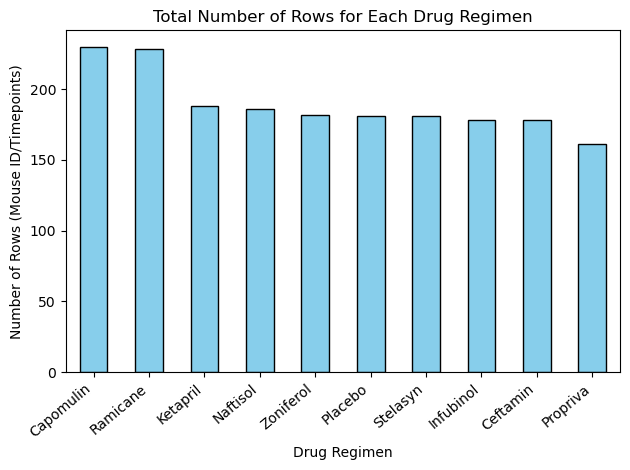

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = combined_data["Drug Regimen"].value_counts()

# Generate the bar plot
drug_regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


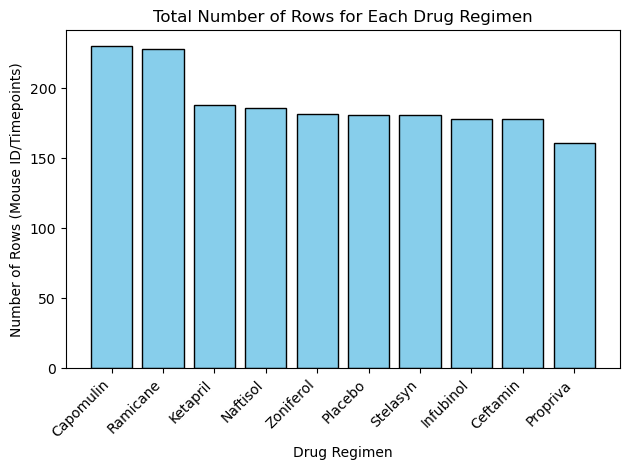

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by the drug regimen and count the number of rows for each group
drug_regimen_counts = combined_data["Drug Regimen"].value_counts()

# Get the drug regimens and their corresponding row counts
drug_regimens = drug_regimen_counts.index
row_counts = drug_regimen_counts.values

# Create the bar plot
plt.bar(drug_regimens, row_counts, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

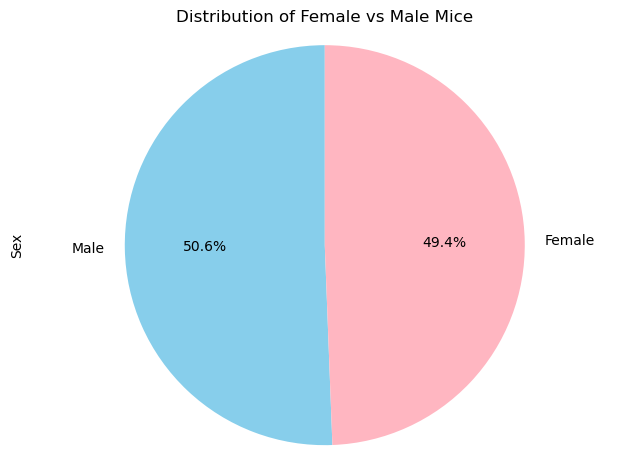

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_counts = combined_data["Sex"].value_counts()

# Generate the pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Set aspect ratio to equal for a circular pie plot
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

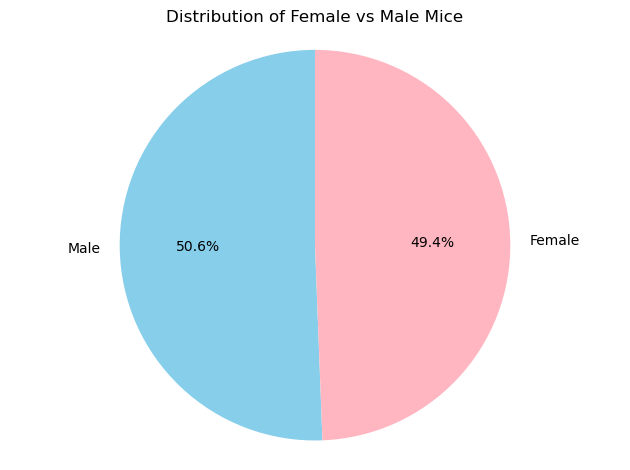

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_data["Sex"].value_counts()

# Get the genders and their corresponding counts
genders = gender_counts.index
counts = gender_counts.values

# Create the pie plot using pyplot
plt.pie(counts, labels=genders, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Set aspect ratio to equal for a circular pie plot
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoints = last_timepoints.reset_index()

# Step 2: Create a DataFrame containing only the data for the mice with the last timepoint
final_tumor_volume_data = combined_data[combined_data['Mouse ID'].isin(last_timepoints.index) &
                                        combined_data['Timepoint'].isin(last_timepoints.values)]

# Step 3: Filter the DataFrame to include only the specified treatment regimens
final_tumor_volume_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame with the final tumor volume for each mouse across the four treatment regimens
print(final_tumor_volume_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

     Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0        k403     Ramicane          0           45.000000
1        k403     Ramicane          5           38.825898
2        k403     Ramicane         10           35.014271
3        k403     Ramicane         15           34.223992
4        k403     Ramicane         20           32.997729
...       ...          ...        ...                 ...
1868     z581    Infubinol         25           54.316407
1869     z581    Infubinol         30           56.286750
1870     z581    Infubinol         35           58.628399
1871     z581    Infubinol         40           60.053740
1872     z581    Infubinol         45           62.754451

[814 rows x 4 columns]


## Line and Scatter Plots

In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    # add subset 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers:\n{potential_outliers}")

Capomulin's potential outliers:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


ValueError: Dimensions of labels and X must be compatible

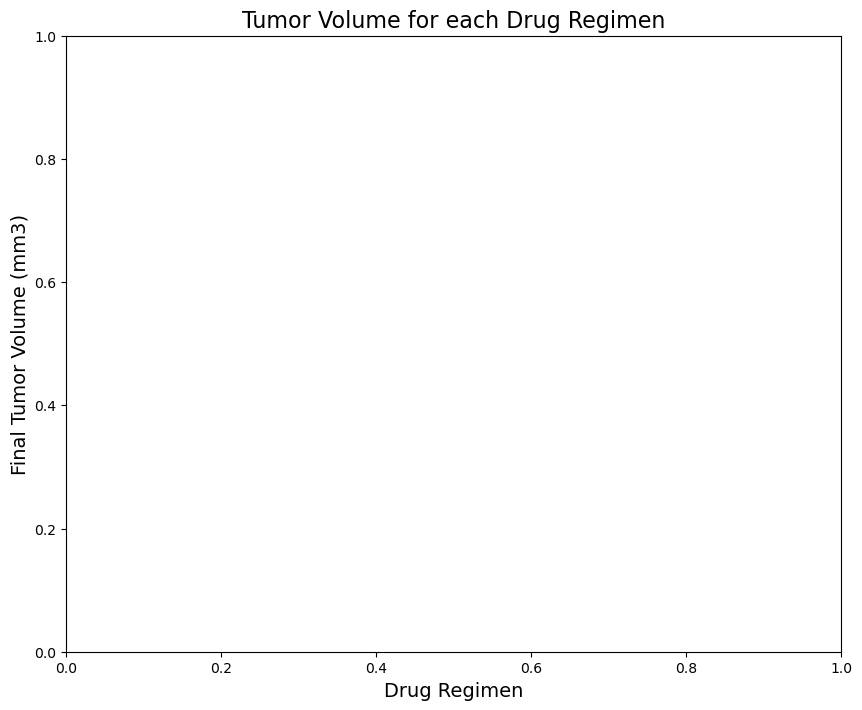

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_volumes, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter data for Capomulin treatment
capomulin_data = tumor_vol_data[tumor_vol_data['Drug Regimen'] == 'Capomulin']

# Step 2: Choose a single mouse from Capomulin group (replace 'mouse_id' with the desired mouse ID)
selected_mouse_id = 'mouse_id'  # Replace with the ID of the mouse you want to plot
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Step 3: Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin Treatment)")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

TypeError: list indices must be integers or slices, not str

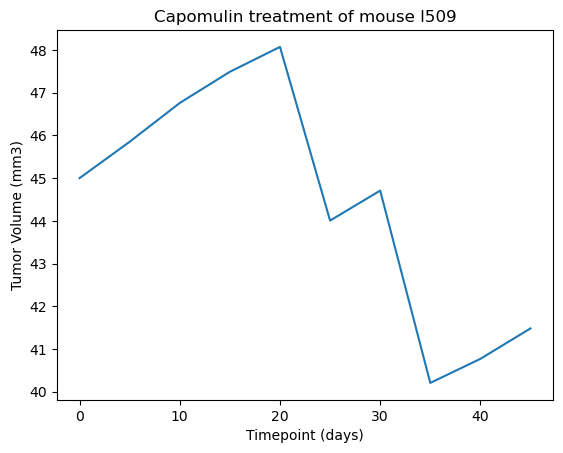

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


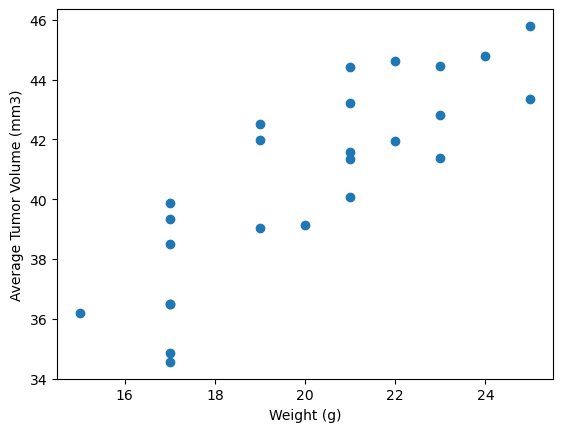

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


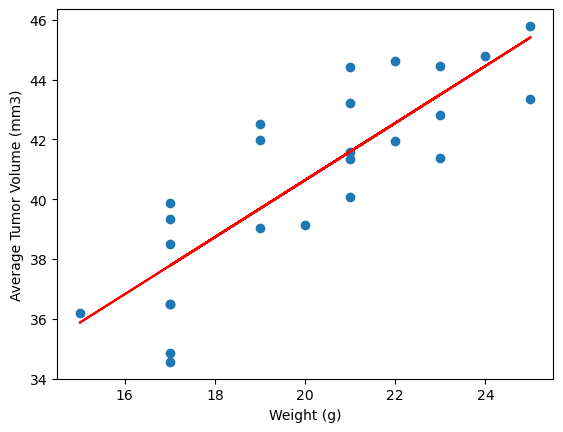

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
